In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from collections import deque
import random
import os
import sys
import pathlib
from collections import deque
from tqdm.notebook import tqdm, trange
import datetime
from scipy import interpolate
import math
from tqdm import tqdm
import matplotlib.ticker as mtick
import matplotlib.dates as md

from IPython.display import clear_output

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
import gpytorch
import matplotlib.dates as md

parent_module_path = os.path.abspath(os.path.join('..'))
if parent_module_path not in sys.path:
    sys.path.append(parent_module_path)
    
pd.set_option('display.width', 1000)
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('mode.chained_assignment', None)

In [66]:
from AOE.gp_bandit import ExactGPModel, Wasserstein_GP_mean

## Setup test

In [67]:
#Create function to approximate
reward = lambda x: x**2

In [71]:
test_x = torch.linspace(-1, 1, 100).double()
nb_samples = 500
nb_N = 20


distances = np.zeros(nb_samples)


i = 5
    
for m in tqdm(range(nb_samples)):

    x_new1 = 2*np.random.random(i) - 1
    y_new1 = reward(x_new1)

    x_new2 = 2*np.random.random(i) - 1
    y_new2 = reward(x_new2)

    gp1 = ExactGPModel(torch.tensor(x_new1.reshape(-1,1), dtype=torch.float64), torch.tensor(y_new1, dtype=torch.float64), gpytorch.likelihoods.GaussianLikelihood())
    gp2 = ExactGPModel(torch.tensor(x_new2.reshape(-1,1), dtype=torch.float64), torch.tensor(y_new2, dtype=torch.float64), gpytorch.likelihoods.GaussianLikelihood())

    gp1.eval()
    gp2.eval()

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        observation1 = gp1.likelihood(gp1(test_x))
        observation2 = gp2.likelihood(gp2(test_x))

    posterior_mean_1, posterior_covar_1 = observation1.mean, observation1.covariance_matrix
    posterior_mean_2, posterior_covar_2 = observation2.mean, observation2.covariance_matrix

    distances[m] = Wasserstein_GP_mean(posterior_mean_1.numpy(), posterior_covar_1.numpy(), posterior_mean_2.numpy(), posterior_covar_2.numpy())


100%|█████████████████████████████████████████| 500/500 [01:04<00:00,  7.75it/s]


In [72]:
distances

array([5.51395145e-02, 6.31159543e-02, 3.36860062e-02, 2.38450998e-03,
       6.28820184e-02, 1.96419463e-02, 2.50759816e-02, 1.03243337e-01,
       1.19163227e-01, 2.15122665e-02, 1.48700333e-02, 1.57592305e-03,
       3.41878179e-02, 1.41839467e-02, 7.13717859e-02, 2.72041834e-03,
       3.74708246e-02, 3.94493890e-03, 4.92539854e-02, 5.13767744e-02,
       8.51523709e-02, 3.71282908e-03, 2.06926773e-02, 5.05031902e-02,
       4.02517588e-02, 3.50709589e-02, 8.96163419e-02, 1.03394150e-02,
       1.36915680e-01, 7.11376138e-02, 4.42139272e-02, 1.98135865e-02,
       6.73480805e-02, 5.54678102e-02, 2.71649246e-02, 5.30316691e-02,
       2.25922084e-02, 2.54782887e-02, 1.54672551e-02, 1.68940903e-01,
       7.30262906e-03, 2.25127658e-01, 2.29924196e-02, 1.02952831e-02,
       1.19584704e-02, 5.30435755e-02, 1.27649338e-01, 8.15063976e-02,
       4.94474079e-02, 6.00736192e-02, 4.91754921e-02, 7.42665434e-02,
       1.07127032e-02, 1.80219162e-02, 5.17198860e-02, 1.37179449e-02,
      

In [60]:
test_x = torch.linspace(-1, 1, 100).double()
nb_samples = 500
nb_N = 20
distances = np.zeros((nb_experiments, nb_n_per_experiment))


for i in range(2,nb_N):
    
    
    for m in range(nb_samples):
        
        x_new1 = 2*np.random.random(i) - 1
        y_new1 = reward(x_new1)

        x_new2 = 2*np.random.random(i) - 1
        y_new2 = reward(x_new2)

        gp1 = ExactGPModel(torch.tensor(x_new1.reshape(-1,1), dtype=torch.float64), torch.tensor(y_new1, dtype=torch.float64), gpytorch.likelihoods.GaussianLikelihood())
        gp2 = ExactGPModel(torch.tensor(x_new2.reshape(-1,1), dtype=torch.float64), torch.tensor(y_new2, dtype=torch.float64), gpytorch.likelihoods.GaussianLikelihood())

        gp1.eval()
        gp2.eval()
        
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            observation1 = gp1.likelihood(gp1(test_x))
            observation2 = gp2.likelihood(gp2(test_x))

        posterior_mean_1, posterior_covar_1 = observation1.mean, observation1.covariance_matrix
        posterior_mean_2, posterior_covar_2 = observation2.mean, observation2.covariance_matrix

        distance = Wasserstein_GP_mean(posterior_mean_1.numpy(), posterior_covar_1.numpy(), posterior_mean_2.numpy(), posterior_covar_2.numpy())
        

for p in tqdm(range(nb_experiments)):

    gp1 = ExactGPModel(torch.zeros((0, 1), dtype=torch.float64), torch.zeros(0, dtype=torch.float64), gpytorch.likelihoods.GaussianLikelihood())
    gp2 = ExactGPModel(torch.zeros((0, 1), dtype=torch.float64), torch.zeros(0, dtype=torch.float64), gpytorch.likelihoods.GaussianLikelihood())

    gp1.eval()
    gp2.eval()

    for n in range(nb_n_per_experiment):
        # sample new point
        # Update gp
        # Compute 
        x_new1 = 2*np.random.random() - 1
        y_new1 = reward(x_new1)

        x_new2 = 2*np.random.random() - 1
        y_new2 = reward(x_new2)

        gp1.add_point(x_new1, y_new1)
        gp2.add_point(x_new2, y_new2)
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            observation1 = gp1.likelihood(gp1(test_x))
            observation2 = gp2.likelihood(gp2(test_x))

        posterior_mean_1, posterior_covar_1 = observation1.mean, observation1.covariance_matrix
        posterior_mean_2, posterior_covar_2 = observation2.mean, observation2.covariance_matrix

        distance = Wasserstein_GP_mean(posterior_mean_1.numpy(), posterior_covar_1.numpy(), posterior_mean_2.numpy(), posterior_covar_2.numpy())
        distances[p,n] = distance

100%|███████████████████████████████████████████| 50/50 [17:35<00:00, 21.10s/it]


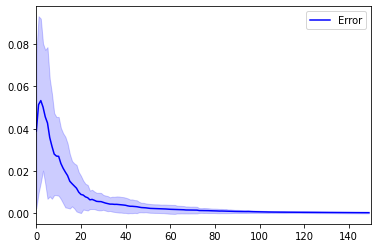

In [61]:
distance_mean = np.mean(distances, axis = 0)
distance_std = np.std(distances, axis = 0)

x = range(nb_n_per_experiment)
plt.plot(x, distance_mean, '-', color='blue', label='Error')
plt.fill_between(x, distance_mean - distance_std, distance_mean + distance_std, color='blue', alpha=0.2)
plt.xlim(0, nb_n_per_experiment)
plt.legend()

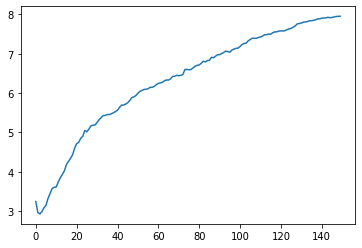

In [62]:
plt.plot(-np.log(distance_mean))

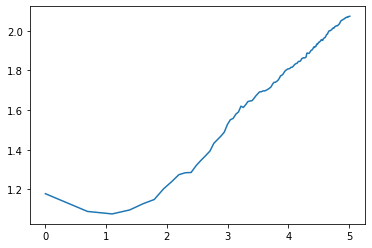

In [63]:
plt.plot(np.log(range(1, nb_n_per_experiment+1)), np.log(-np.log(distance_mean)))

/tmp/ipykernel_35672/351520457.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(np.log(-np.log(distance_mean))/np.log(range(1, nb_n_per_experiment+1)))


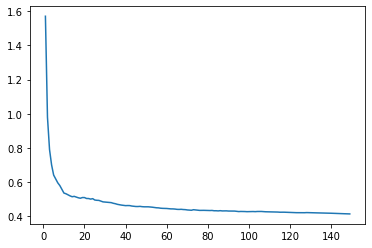

In [64]:
plt.plot(np.log(-np.log(distance_mean))/np.log(range(1, nb_n_per_experiment+1)))

In [56]:
np.log(range(nb_n_per_experiment))

/tmp/ipykernel_35672/2895698303.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(range(nb_n_per_experiment))


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458,
       2.30258509, 2.39789527, 2.48490665, 2.56494936, 2.63905733,
       2.7080502 , 2.77258872, 2.83321334, 2.89037176, 2.94443898,
       2.99573227, 3.04452244, 3.09104245, 3.13549422, 3.17805383,
       3.21887582, 3.25809654, 3.29583687, 3.33220451, 3.36729583,
       3.40119738, 3.4339872 , 3.4657359 , 3.49650756, 3.52636052,
       3.55534806, 3.58351894, 3.61091791, 3.63758616, 3.66356165,
       3.68887945, 3.71357207, 3.73766962, 3.76120012, 3.78418963,
       3.80666249, 3.8286414 , 3.8501476 , 3.87120101, 3.8918203 ])

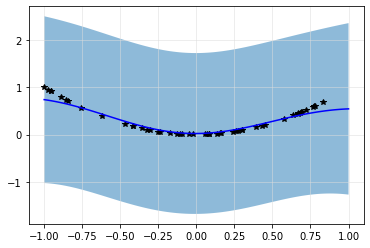

In [47]:
f, ax = plt.subplots(1)

# Get upper and lower confidence bounds
lower, upper = observation1.confidence_region()
# Plot training data as black stars
ax.plot(gp1.train_inputs[0].numpy(), gp1.train_targets.numpy(), 'k*')
# Plot predictive means as blue line
ax.plot(test_x.numpy(), observation1.mean.numpy(), 'b')
# Shade between the lower and upper confidence bounds
ax.fill_between(test_x.detach().numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
# ax.set_ylim([-3, 3])
ax.grid(axis='both', color='gainsboro', linestyle='-', linewidth=0.5)
#ax.yaxis.set_label_positi

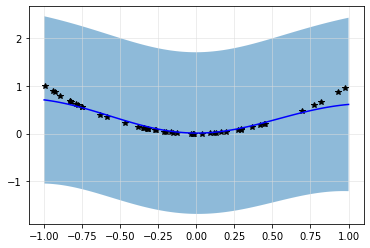

In [48]:
f, ax = plt.subplots(1)

# Get upper and lower confidence bounds
lower, upper = observation2.confidence_region()
# Plot training data as black stars
ax.plot(gp2.train_inputs[0].numpy(), gp2.train_targets.numpy(), 'k*')
# Plot predictive means as blue line
ax.plot(test_x.numpy(), observation2.mean.numpy(), 'b')
# Shade between the lower and upper confidence bounds
ax.fill_between(test_x.detach().numpy(), lower.detach().numpy(), upper.detach().numpy(), alpha=0.5)
# ax.set_ylim([-3, 3])
ax.grid(axis='both', color='gainsboro', linestyle='-', linewidth=0.5)
#ax.yaxis.set_label_positi

In [68]:
np.random.random((10,10))

array([[0.6950716 , 0.16918465, 0.43730887, 0.70079706, 0.71242949,
        0.1163369 , 0.7122726 , 0.87106041, 0.93967789, 0.14172961],
       [0.46435066, 0.35342169, 0.27706056, 0.16776763, 0.82010743,
        0.20871908, 0.91728796, 0.5335205 , 0.0241914 , 0.07733395],
       [0.77971903, 0.27529538, 0.10083416, 0.18292432, 0.55509572,
        0.35706541, 0.07360255, 0.30766423, 0.43941024, 0.55129324],
       [0.20000366, 0.63749195, 0.79287329, 0.74159835, 0.08722875,
        0.72391082, 0.34961813, 0.2258995 , 0.33490391, 0.77966125],
       [0.60292573, 0.60041731, 0.9877184 , 0.61393037, 0.741911  ,
        0.83636634, 0.26823191, 0.95231918, 0.28433162, 0.88444055],
       [0.40951435, 0.1549798 , 0.10174772, 0.86270905, 0.26784965,
        0.99210382, 0.2805311 , 0.77105806, 0.63001545, 0.93386413],
       [0.81165867, 0.24803155, 0.50717866, 0.7896162 , 0.90692169,
        0.74302137, 0.62241004, 0.63746284, 0.75984187, 0.7385086 ],
       [0.74112237, 0.33249817, 0.3886474

In [70]:
2*np.random.random(3)

array([0.77401621, 0.34367253, 1.31256251])